Steps  
    1.) Introduction to the Iris Data Set  
    2.) Introduction to Multi-Class Classification (Logistic Regression)  
    3.) Data Formatting   
    4.) Data Visualization Analysis  
    5.) Multi-Class Classification with Sci Kit Learn  
    6.) Explanation of K Nearest Neighbors  
    7.) K Nearest Neighbors with Sci Kit Learn  
    8.) Conclusion

### 1.) Intro to Iris DS

[Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)  
to predict the spieces of Iris using features

### 2.) Intro to Multi-Class Cassification
One versus all method: Perfrom logistic regression for a specific type (1) or other type(0) for each category. Highest possibility is the prediction}

### 3.) Data Formatting 

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

In [4]:
from sklearn import linear_model
from sklearn.datasets import load_iris 

In [22]:
iris= load_iris()

In [23]:
X= iris.data
Y= iris.target

In [24]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [65]:
iris_data= DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target=DataFrame(Y, columns=['Species'])

In [66]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [67]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


Spieces are difined as 0,1,2  
Lets change them into names

In [68]:
def flower(num):
    if num==0:
        return 'Satosa'
    elif num==1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [69]:
iris_target['Species'] = iris_target['Species'].apply(flower)  # DO NOT run `iris_target.head()` in this cell

In [70]:
iris_target.head() # Run in the separate cell 

,Species
0,Satosa
1,Satosa
2,Satosa
3,Satosa
4,Satosa


### Data Vidualisation Analysis

In [71]:
iris= pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Satosa
1,4.9,3.0,1.4,0.2,Satosa
2,4.7,3.2,1.3,0.2,Satosa
3,4.6,3.1,1.5,0.2,Satosa
4,5.0,3.6,1.4,0.2,Satosa


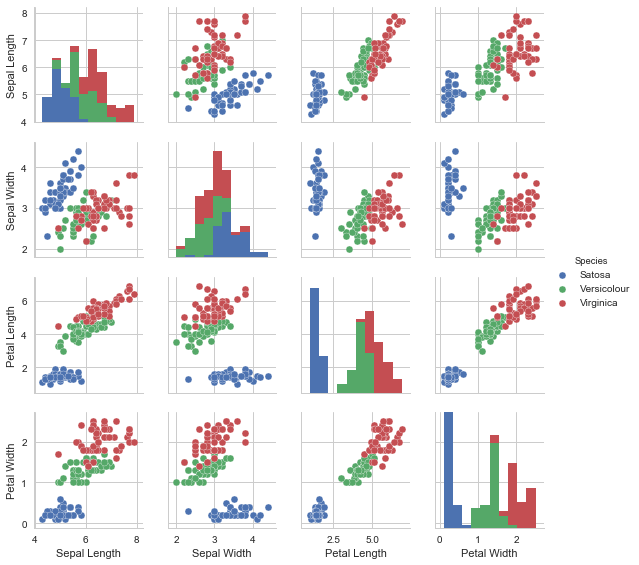

In [72]:
sns.pairplot(iris,hue='Species',size=2)

It seems easier to distinguish Satosa and others, than Versicolur and Virginica

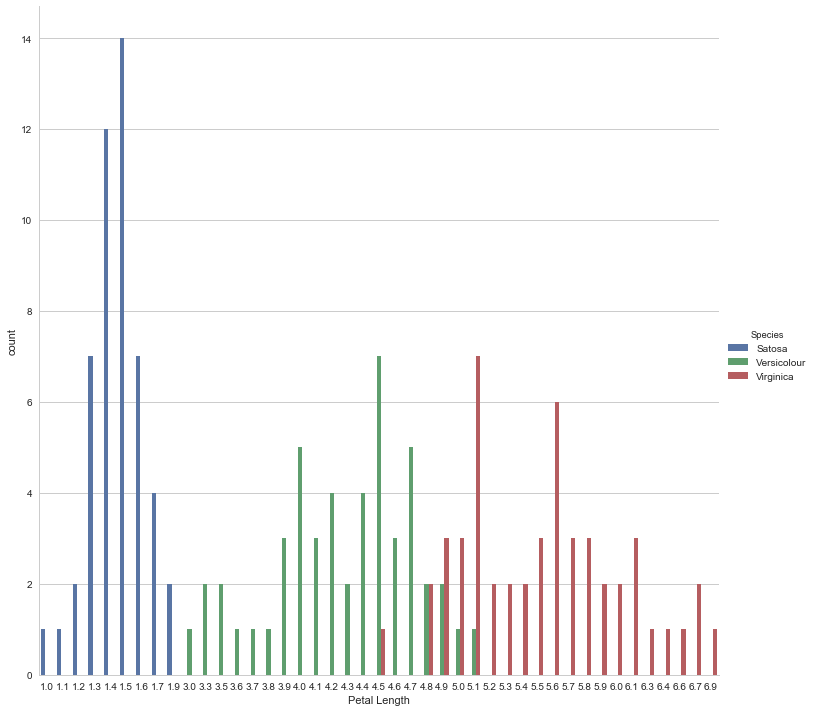

In [76]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind='count')

Versicolour and Virginica overlap, but no overlap for Satosa

### Multi-Class Classification with Sci Kit Learn

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

logreg= LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)

In [152]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,Y_pred))

0.933333333333


In [153]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[22,  0,  0],
       [ 0, 16,  4],
       [ 0,  0, 18]])

confusion matrix, y_true on axis 0, y_pred on axis 1  
22+16+18 correct predictions,  
4 inaccurate pred (1 in reality, but predicted 2)

In [139]:
Result=DataFrame(list(zip(Y_test,Y_pred)),columns=['Y_test','Y_pred'])
Result['TF']=Result.Y_test - Result.Y_pred
Result.head(8)

,Y_test,Y_pred,TF
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,2,2,0
6,1,1,0
7,0,0,0


In [140]:
def tf(num):
    if num==0:
        return 'True'
    else:
        return 'False'

In [141]:
Result['TF']  = Result['TF'].apply(tf)
Result

,Y_test,Y_pred,TF
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,2,2,True
6,1,1,True
7,0,0,True
8,2,2,True
9,1,1,True


### [k nearest neighbours (kNN)](http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

In [161]:
print(metrics.accuracy_score(Y_test,y_pred))

0.95


In [162]:
metrics.confusion_matrix(Y_test,y_pred)

array([[22,  0,  0],
       [ 0, 17,  3],
       [ 0,  0, 18]])

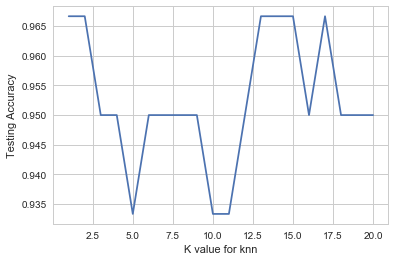

In [168]:
# Try to find the highest accuracy rate by changing n_neighbors
k_range=range(1,21)
accuracy=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,y_pred))
    
matplotlib.pyplot.plot(k_range,accuracy)
matplotlib.pyplot.xlabel('K value for knn')
matplotlib.pyplot.ylabel('Testing Accuracy')